# Principal Component Analysis

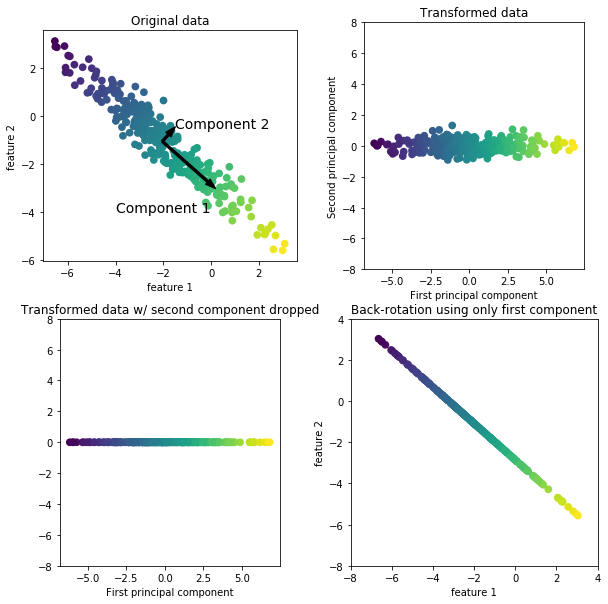

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import mglearn
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


d = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(d.data)
X_scaled = scaler.transform(d.data)

mglearn.plots.plot_pca_illustration()

Text(0, 0.5, 'Second pc')

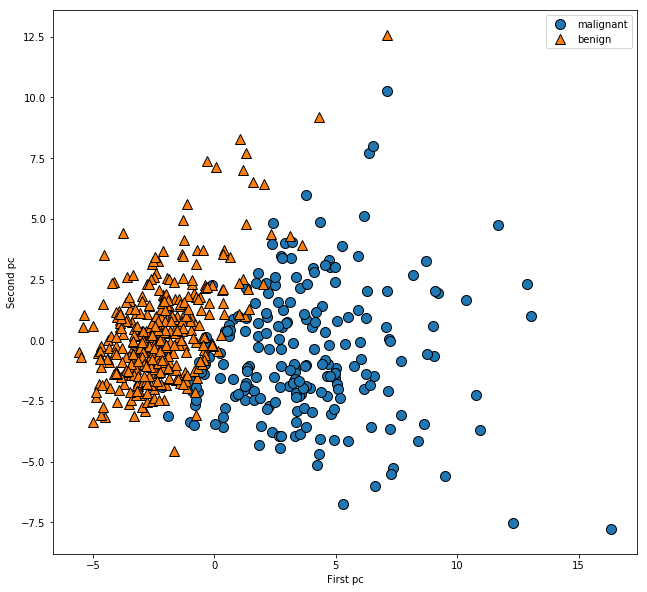

In [2]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

plt.figure(figsize=(11, 10))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], d.target);
plt.legend(d.target_names)
plt.gca().set_aspect('equal')
plt.xlabel('First pc')
plt.ylabel('Second pc')

In [3]:
import gc
del d, pca, X_pca, X_scaled, scaler
gc.collect()

8333

### Face recognition

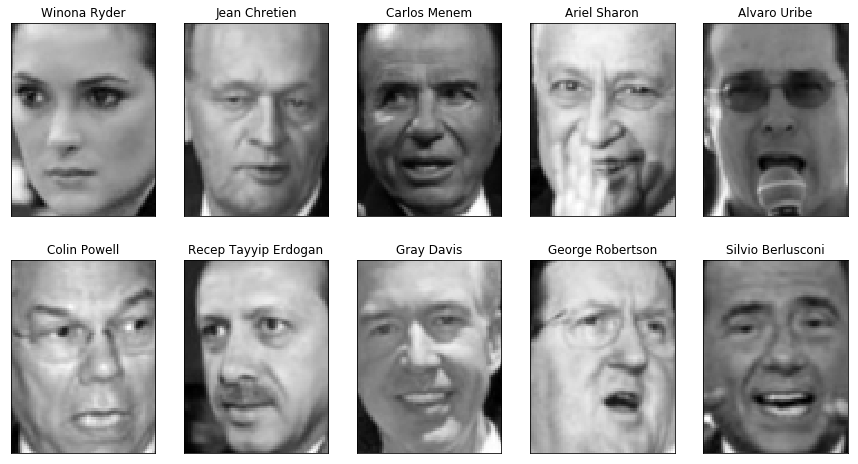

In [4]:
from sklearn.datasets import fetch_lfw_people


people = fetch_lfw_people(min_faces_per_person=20, resize=.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(),'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

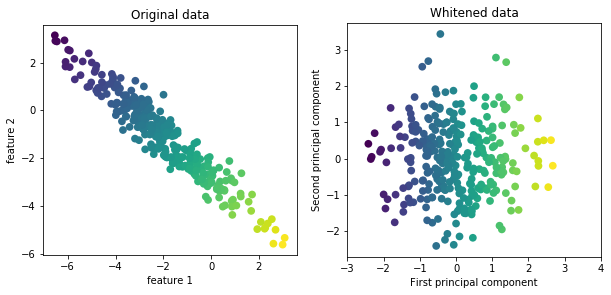

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    # take max of 50 images from each person
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255 # this scales them down between 0 and 1

# data selection
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
mglearn.plots.plot_pca_whitening()

In [6]:
knn.fit(X_train, y_train)
print('Accuracy without decomposed data:', knn.score(X_test, y_test))

Accuracy without decomposed data: 0.23255813953488372


In [7]:
knn.fit(X_train_pca, y_train)
print('Accuracy with decomposed data:', knn.score(X_test_pca, y_test))

Accuracy with decomposed data: 0.312015503875969


In [8]:
# tring out neural network 
from sklearn.neural_network import MLPClassifier

mlp2 = MLPClassifier(
    max_iter=100,
    hidden_layer_sizes=[1000],
    alpha=0,
    random_state=2,
    learning_rate_init=0.1)

mlp2.fit(X_train_pca, y_train)

print('Test set accuracy:', mlp2.score(X_test_pca, y_test))

Test set accuracy: 0.42248062015503873


In [9]:
del mlp2, fig, axes, people
gc.collect()

4402

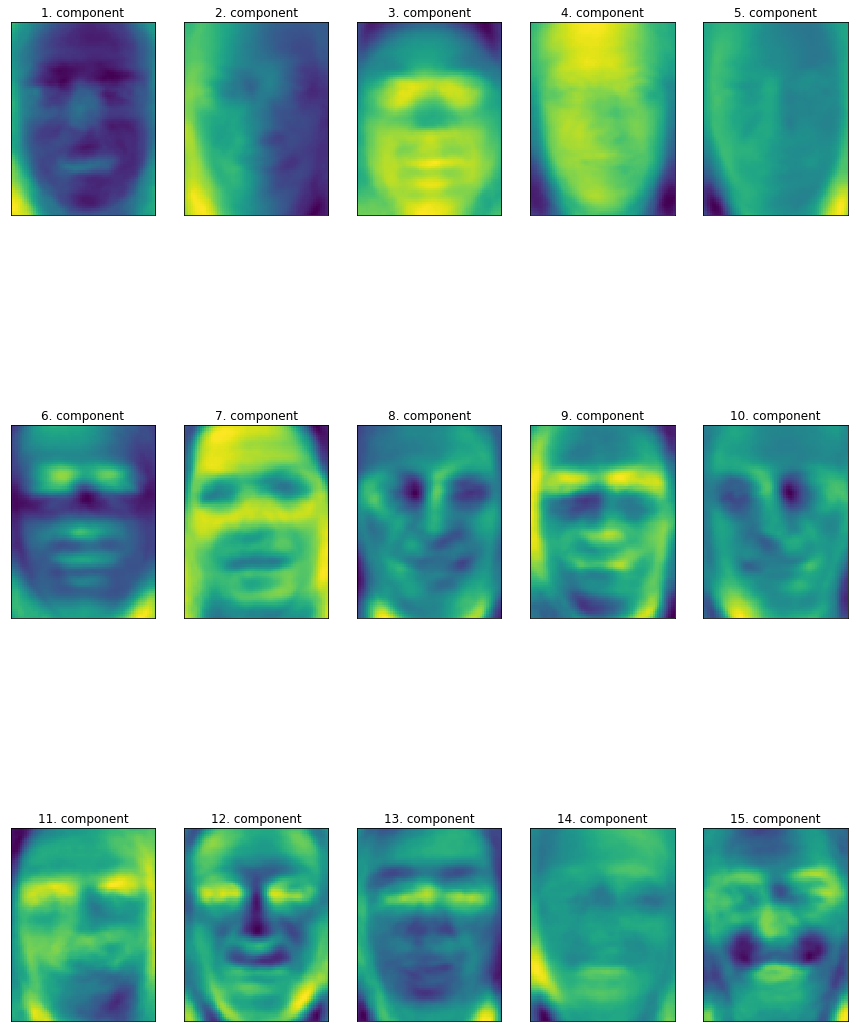

In [10]:
skw = {'xticks':(),'yticks':()}
fig, axes = plt.subplots(3, 5, figsize=(15, 21), subplot_kw=skw)

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    
    ax.set_title('%d. component' % (i + 1))